# Project 23 - Deep Autoencoders with CIFAR-10 Data

In [ ]:
from torchvision import datasets, transforms
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

In [ ]:
dataset_train = datasets.CIFAR10('Datasets', train=True, download=True, transform=transforms.ToTensor())
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=256, shuffle=True)

In [ ]:
dataset_val = datasets.CIFAR10('Datasets', train=False, download=True, transform=transforms.ToTensor())
loader_val = torch.utils.data.DataLoader(dataset_val, batch_size=256, shuffle=True)

In [ ]:
sample = next(iter(loader_train))[0]

sample_image = sample[0].permute(1, 2, 0)


plt.imshow(sample_image)
plt.show()

In [ ]:
print(len(dataset_train))

In [ ]:
sample.shape

In [ ]:
class autoencoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder0 = nn.Linear(in_features=32*32*3, out_features=1536)
        self.encoder1 = nn.Linear(in_features=1536, out_features=768)
        self.encoder2 = nn.Linear(in_features=768, out_features=384)
        self.encoder3 = nn.Linear(in_features=384, out_features=192)

        self.decoder0 = nn.Linear(in_features=192, out_features=384)
        self.decoder1 = nn.Linear(in_features=384, out_features=768)
        self.decoder2 = nn.Linear(in_features=768, out_features=1536)
        self.decoder3 = nn.Linear(in_features=1536, out_features=32*32*3)

        self.activation0 = nn.ReLU()
        self.activation1 = nn.Sigmoid()

    def forward(self, x):
        x = self.activation0(self.encoder0(x))
        x = self.activation0(self.encoder1(x))
        x = self.activation0(self.encoder2(x))
        x = self.activation0(self.encoder3(x))

        x = self.activation0(self.decoder0(x))
        x = self.activation0(self.decoder1(x))
        x = self.activation0(self.decoder2(x))
        x = self.activation1(self.decoder3(x))

        return x

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = autoencoder().to(device)

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
for epoch in range(10):
    running_loss_train = 0

    for data in loader_train:
        model.train()
        inputs, _ = data

        inputs = inputs.view(-1, 32*32*3).to(device)

        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, inputs.view(*outputs.shape))
        loss.backward()

        optimizer.step()

        running_loss_train += loss.item()

    running_loss_val = 0
    for data in loader_val:
        model.eval()
        inputs, _ = data

        inputs = inputs.view(-1, 32*32*3).to(device)
        outputs = model(inputs)

        loss = criterion(outputs, inputs.view(*outputs.shape))
        running_loss_val += loss.item()

    print(f'Epoch {epoch+1}/{10} - Loss Train: {running_loss_train/len(loader_train)} - Loss Val: {running_loss_val/len(loader_val)}')
    print(*outputs.shape)

In [24]:
list(model.children())

[Linear(in_features=3072, out_features=1536, bias=True),
 Linear(in_features=1536, out_features=768, bias=True),
 Linear(in_features=768, out_features=384, bias=True),
 Linear(in_features=384, out_features=192, bias=True),
 Linear(in_features=192, out_features=384, bias=True),
 Linear(in_features=384, out_features=768, bias=True),
 Linear(in_features=768, out_features=1536, bias=True),
 Linear(in_features=1536, out_features=3072, bias=True),
 ReLU(),
 Sigmoid()]

In [25]:
class encoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder0 = list(model.children())[0]
        self.encoder1 = list(model.children())[1]
        self.encoder2 = list(model.children())[2]
        self.encoder3 = list(model.children())[3]

        self.activation = list(model.children())[8]

    def forward(self, x):
        x = self.activation(self.encoder0(x))
        x = self.activation(self.encoder1(x))
        x = self.activation(self.encoder2(x))
        x = self.activation(self.encoder3(x))

        return x

In [26]:
model1 = encoder().to(device)

In [27]:
class decoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.decoder0 = list(model.children())[4]
        self.decoder1 = list(model.children())[5]
        self.decoder2 = list(model.children())[6]
        self.decoder3 = list(model.children())[7]

        self.activation = list(model.children())[8]

    def forward(self, x):
        x = self.activation(self.decoder0(x))
        x = self.activation(self.decoder1(x))
        x = self.activation(self.decoder2(x))
        x = self.activation(self.decoder3(x))

        return x

In [72]:
model2 = decoder().to(device)

In [89]:
sample_size = 10

test_image = next(iter(loader_val))[0][:sample_size].view(-1, 32*32*3).to(device)

In [90]:
model1.eval()
codify_image = model1(test_image)

In [91]:
model2.eval()
reconstructed_image = model2(codify_image)

In [92]:
test_image = test_image.view(-1, 3, 32, 32).permute(0, 2, 3, 1).detach().cpu().numpy()
reconstructed_image = reconstructed_image.view(-1, 3, 32, 32).permute(0, 2, 3, 1).detach().cpu().numpy()

In [93]:
codify_image = codify_image.detach().cpu().numpy()
codify_image = codify_image.reshape(-1, 8, 8, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

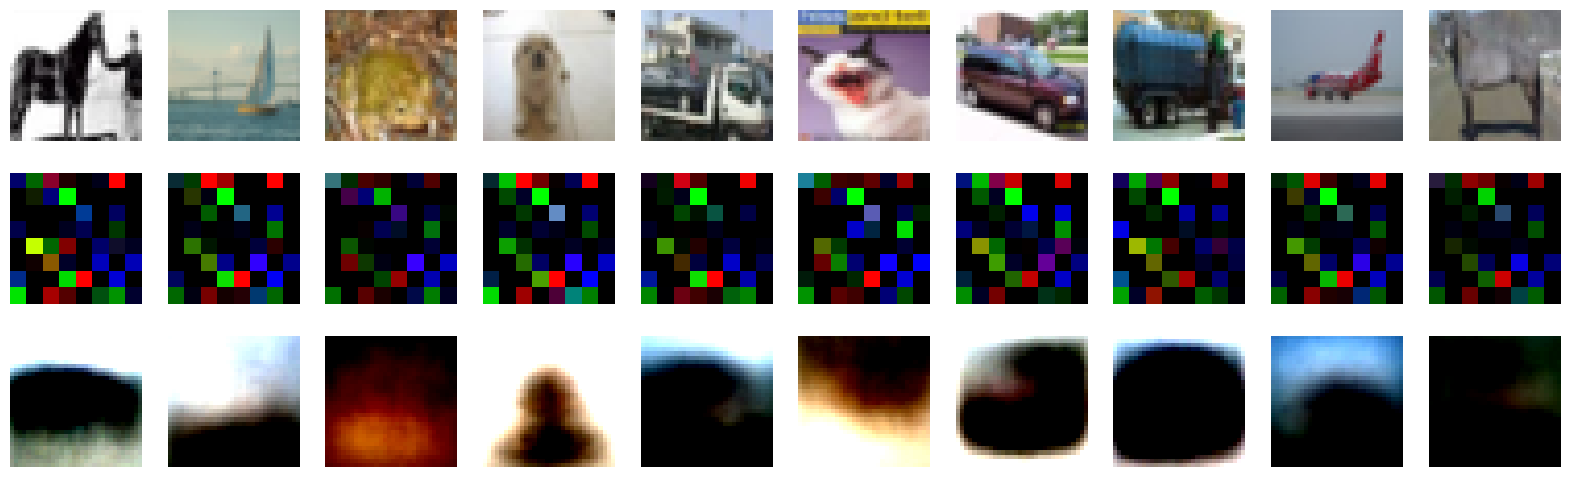

In [95]:
fig, axes = plt.subplots(3, sample_size, figsize=(20, 6))

for images, ax_row in zip([test_image, codify_image, reconstructed_image], axes):
    for img, ax in zip(images, ax_row):
        ax.imshow(img)
        ax.axis('off')